# REGRESSION MODELING LOSS GIVEN DEFAULT

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
%config IPCompleter.greedy=True
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

## UPLOAD DATA

In [8]:
path = '../../'

In [9]:
name = 'df_tablon_lgd.pickle'

In [10]:
df = pd.read_pickle(path + '/02_Data/03_Work/' + name)

## X e Y

In [11]:
x = df.drop(columns='target_lgd')
y = df.target_lgd

## MODELLING

### Validation Dataset

In [12]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### pipe and the dictionary of algorithms, parameters and values ​​to test

In [13]:
pipe = Pipeline([('algorithm',Ridge())])

grid = [      
        {'algorithm': [Ridge()],
         'algorithm__alpha': list(np.arange(0.1,1.1,0.1))},
        
        {'algorithm': [Lasso()],
         'algorithm__alpha': list(np.arange(0.1,1.1,0.1))},
    
        {'algorithm': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_percentage_error')],
         'algorithm__learning_rate': [0.01,0.025,0.05,0.1],
         'algorithm__max_iter': [50,100,200],
         'algorithm__max_depth': [5,10,20],
         'algorithm__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimize hyper parameters

####  Grid search

In [14]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 0,
                           n_jobs = -1)

model = grid_search.fit(train_x,train_y)

In [15]:
sal = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(10)
sal

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_algorithm__alpha,param_algorithm__l2_regularization,param_algorithm__learning_rate,param_algorithm__max_depth,param_algorithm__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,74.07,14.77,1.47,0.31,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,20,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,1
1,79.49,15.57,1.46,0.29,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,20,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,2
2,53.32,5.77,0.82,0.10,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,3
3,61.07,14.57,1.25,0.28,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,10,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,4
4,62.27,12.79,1.22,0.23,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,5
5,50.50,0.76,1.02,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,10,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,6
6,83.96,0.42,1.39,0.14,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.37,-0.37,0.00,7
7,76.21,17.71,1.47,0.31,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,20,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.37,-0.38,-0.37,0.00,8
8,58.99,17.19,1.19,0.31,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.38,-0.37,0.00,9
9,49.49,3.08,1.00,0.05,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,10,200,{'algorithm': HistGradientBoostingRegressor(l2...,-0.38,-0.37,-0.38,-0.38,0.00,10


In [16]:
model_lgd = HistGradientBoostingRegressor(learning_rate = 0.1,
                                          max_iter = 200,
                                          max_depth = 20,
                                          min_samples_leaf = 100,
                                          scoring = 'neg_mean_absolute_percentage_error',
                                          l2_regularization = 0.25)
model_lgd.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=20,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUATE

### Predict on validation

In [17]:
pred = model_lgd.predict(val_x)

Fix max and min.

In [18]:
pred = np.where(pred < 0, 0, pred)
pred = np.where(pred > 1, 1, pred)

### Evalute on validation

In [19]:
mean_absolute_error(val_y, pred)

0.37209746358944773

## MODEL REPORTING

In [20]:
check_validation = pd.DataFrame({'lgd_real':val_y, 'lgd_pred':pred})
check_validation

,lgd_real,lgd_pred
id_cliente,,
132287775,1.00,0.91
141924648,1.00,0.77
57695241,1.00,0.47
124016109,0.00,0.70
131155957,1.00,0.87
...,...,...
138443207,1.00,0.51
120255931,0.00,0.56
140107113,1.00,0.66


In [21]:
check_validation.corr()

,lgd_real,lgd_pred
lgd_real,1.00,0.52
lgd_pred,0.52,1.00


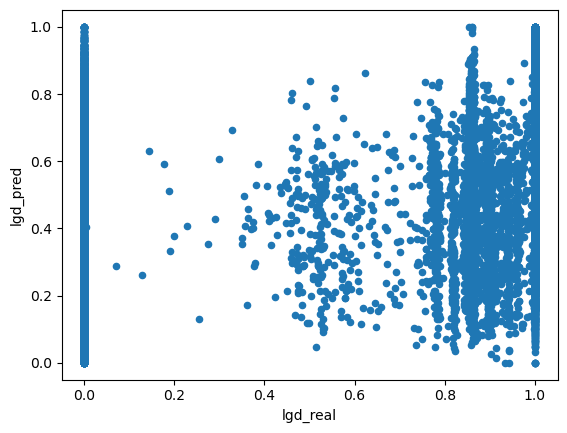

In [22]:
check_validation.plot.scatter(x='lgd_real',y='lgd_pred');

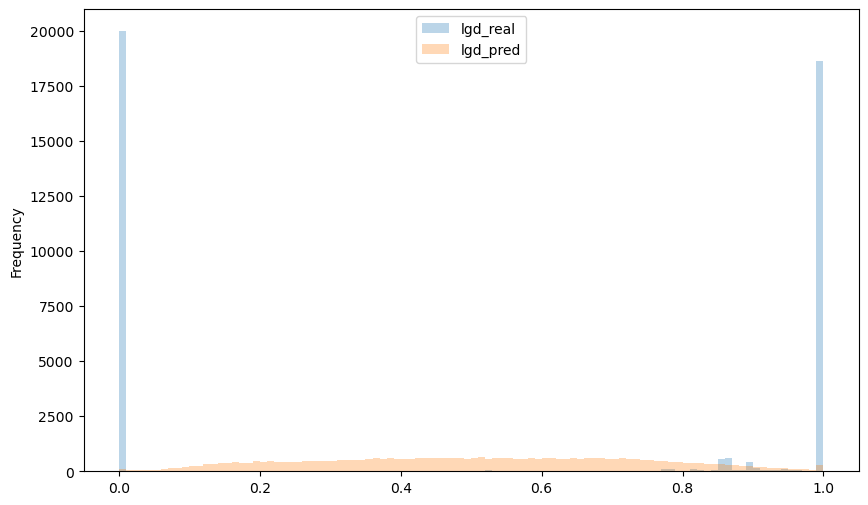

In [23]:
check_validation.plot.hist(bins = 100,figsize = (10,6), alpha = 0.3);